# <font color='#154360'> <center> FUNCTIONAL API </center> </font>

TABLKE OF CONTENTS...

<a name="1"></a>
## <font color='blue'> 1. Introduction </font>

This notebook demonstrates how to use the Keras Functional API to build neural networks. Through a few simple examples, we will explore how it provides more flexibility than the Sequential API, allowing for multiple inputs, multiple outputs, and shared layers.

<a name="2"></a>
## <font color='blue'> Setup </font>

In [94]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
import random

In [95]:
# Set seed for Python’s built-in random module
random.seed(42)

# Set seed for NumPy
np.random.seed(42)

# Set seed for TensorFlow
tf.random.set_seed(42)

<a name="fds"></a>
## <font color='blue'> 3. Basic example </font>

We will write a simple Sequential model and then rewrite it using the Functional API.

### Sequential model

In [91]:
# Using Sequential API
def sequential_api_model():
    model = Sequential([
        Input(shape=(5,)),  # Input layer with 5 features
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# instanciate
seq_model = sequential_api_model()


# Print summary
seq_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 128)               768       
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9089 (35.50 KB)
Trainable params: 9089 (35.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Functional API

In [88]:
# Using Functional API
def functional_api_model():
    input_layer = Input(shape=(5,))
    x = Dense(128, activation='relu')(input_layer)
    x = Dense(64, activation='relu')(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# instanciate
func_model = functional_api_model()

# Print summary
func_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_24 (Dense)            (None, 128)               768       
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9089 (35.50 KB)
Trainable params: 9089 (35.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Note that with the Functional API the `summary` method also prints the input layer.

<a name="fds"></a>
## <font color='blue'> 4. Multi-output model </font>

### <font color='#1f618d'> Helper Functions </font>

In [60]:
# plot history
def plot_history(history):
    # Plot training & validation loss values
    plt.figure(figsize=(12, 5))

   

    # Plot RMSE values
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['y1_output_root_mean_squared_error'], label='Train y1 RMSE')
    plt.plot(history.history['val_y1_output_root_mean_squared_error'], label='Val y1 RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.title('y1 RMSE')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['y2_output_root_mean_squared_error'], label='Train y2 RMSE')
    plt.plot(history.history['val_y2_output_root_mean_squared_error'], label='Val y2 RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.title('y2 RMSE')

    plt.show()

### <font color='#1f618d'> Data </font>

We will create synthetic data.

The data will have:
- 5 features
- 2 targets

In [36]:
# Generate features and two target variables
X = np.random.rand(100, 5)

# Generate two target variables for each sample
y1 = X[:, 0] * 3 + X[:, 1] * 2 + X[:, 2] * 0.5 + np.random.normal(0, 0.1, 100)  # A random function of X
y2 = X[:, 3] * 4 + X[:, 4] * 1.5 + np.random.normal(0, 0.1, 100)  # Another random function of X

# Create a DataFrame for features
data = pd.DataFrame(X, columns=['X1', 'X2', 'X3', 'X4', 'X5'])
data['y1'] = y1
data['y2'] = y2

# Split the features and targets and convert to numpy arrays
X_features = data[['X1', 'X2', 'X3', 'X4', 'X5']].values  # Convert to numpy array
y1_target = data['y1'].values  # Convert to numpy array
y2_target = data['y2'].values  # Convert to numpy array

# Train/test split (80% train, 20% test)
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X_features, 
                                                                          y1_target, 
                                                                          y2_target, 
                                                                          test_size=0.2, 
                                                                          random_state=42)

# Verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y1_train shape:", y1_train.shape)
print("y1_test shape:", y1_test.shape)
print("y2_train shape:", y2_train.shape)
print("y2_test shape:", y2_test.shape)


X_train shape: (80, 5)
X_test shape: (20, 5)
y1_train shape: (80,)
y1_test shape: (20,)
y2_train shape: (80,)
y2_test shape: (20,)


### <font color='#1f618d'> Build, compile, train and evaluate the model </font>

We will build the following model:


<img src="images/multiple_outputs.png"/>

### Build

In [66]:
# Build model
def build_model(input_shape):
    # Define model layers.
    input_layer = Input(shape=(input_shape,))
    first_dense = Dense(units='128', activation='relu')(input_layer)
    second_dense = Dense(units='128', activation='relu')(first_dense)

    # Y1 output will be fed directly from the second dense
    y1_output = Dense(units='1', name='y1_output')(second_dense)
    third_dense = Dense(units='64', activation='relu')(second_dense)

    # Y2 output will come via the third dense
    y2_output = Dense(units='1', name='y2_output')(third_dense)

    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=[y1_output, y2_output])
    
    return model

model = build_model(X_train.shape[1])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 5)]                  0         []                            
                                                                                                  
 dense_9 (Dense)             (None, 128)                  768       ['input_4[0][0]']             
                                                                                                  
 dense_10 (Dense)            (None, 128)                  16512     ['dense_9[0][0]']             
                                                                                                  
 dense_11 (Dense)            (None, 64)                   8256      ['dense_10[0][0]']            
                                                                                            

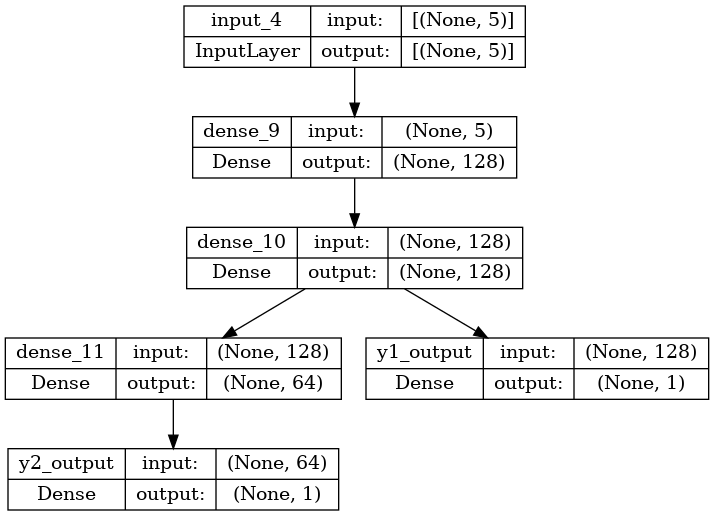

In [67]:
# plot the model
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

### Compile

In [68]:
# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)

model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

### Train

In [69]:
history = model.fit(X_train, {'y1_output': y1_train, 'y2_output': y2_train}, 
                    epochs=100, batch_size=32, 
                    verbose=0,
                    validation_data=(X_test, {'y1_output': y1_test, 'y2_output': y2_test}))

In [70]:
# keys in history
print(history.history.keys())

dict_keys(['loss', 'y1_output_loss', 'y2_output_loss', 'y1_output_root_mean_squared_error', 'y2_output_root_mean_squared_error', 'val_loss', 'val_y1_output_loss', 'val_y2_output_loss', 'val_y1_output_root_mean_squared_error', 'val_y2_output_root_mean_squared_error'])


In [71]:
# last values in history

last_loss = history.history['loss'][-1]  # Last training loss
last_val_loss = history.history['val_loss'][-1]  # Last validation loss

last_y1_loss = history.history['y1_output_loss'][-1]  # Last y1 training loss
last_y2_loss = history.history['y2_output_loss'][-1]  # Last y2 training loss

last_y1_rmse = history.history['y1_output_root_mean_squared_error'][-1]  # Last y1 RMSE
last_y2_rmse = history.history['y2_output_root_mean_squared_error'][-1]  # Last y2 RMSE

print("Last Training Loss:", last_loss)
print("Last Validation Loss:", last_val_loss)
print("Last y1 Loss:", last_y1_loss)
print("Last y2 Loss:", last_y2_loss)
print("Last y1 RMSE:", last_y1_rmse)
print("Last y2 RMSE:", last_y2_rmse)


Last Training Loss: 1.2763093709945679
Last Validation Loss: 1.0364199876785278
Last y1 Loss: 0.5005489587783813
Last y2 Loss: 0.7757604718208313
Last y1 RMSE: 0.707494854927063
Last y2 RMSE: 0.8807726502418518


<Figure size 1200x500 with 0 Axes>

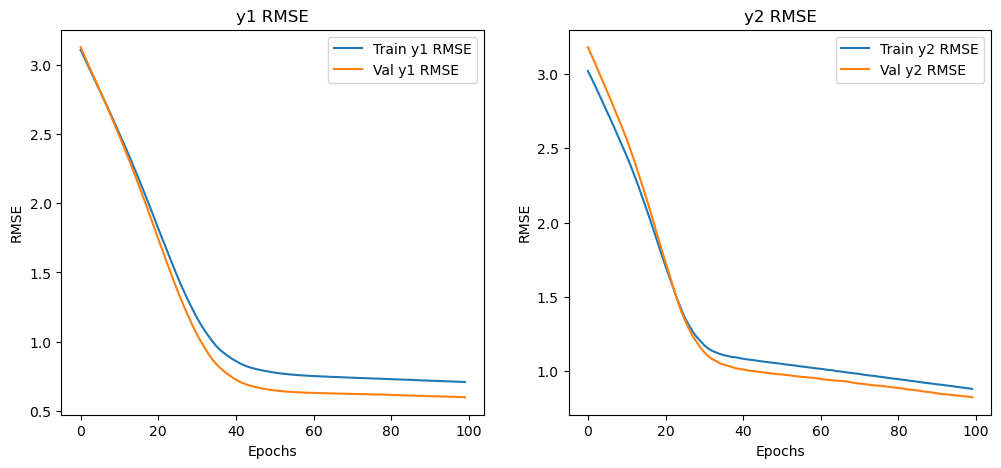

In [72]:
# Plot history
plot_history(history)

### Evaluate

In [73]:
# Evaluate the model on the test data
loss, y1_loss, y2_loss, y1_mae, y2_mae = model.evaluate(X_test, 
                                                          {'y1_output': y1_test, 'y2_output': y2_test})

# Print the results
print(f"Test Loss: {loss}")
print(f"Y1 Output Loss: {y1_loss}")
print(f"Y2 Output Loss: {y2_loss}")
print(f"Y1 MAE: {y1_mae}")
print(f"Y2 MAE: {y2_mae}")

1/1 [==============================] - 0s 21ms/step - loss: 1.0364 - y1_output_loss: 0.3568 - y2_output_loss: 0.6796 - y1_output_root_mean_squared_error: 0.5974 - y2_output_root_mean_squared_error: 0.8244
Test Loss: 1.0364199876785278
Y1 Output Loss: 0.3568285405635834
Y2 Output Loss: 0.6795914769172668
Y1 MAE: 0.5973512530326843
Y2 MAE: 0.8243733644485474


### <font color='#1f618d'> Making predictions </font>

In [80]:
# Predicting for a single sample (make sure the input is 2D even for one sample)
single_sample = X_test[0].reshape(1, -1)  # Reshape to (1, input_shape)

# Make a prediction for the single sample
y1_single_pred, y2_single_pred = model.predict(single_sample)

# Print the predictions for y1 and y2
print("Predicted Y1 for single sample:", y1_single_pred)
print("Predicted Y2 for single sample:", y2_single_pred)


1/1 [==============================] - 0s 15ms/step
Predicted Y1 for single sample: [[2.7449756]]
Predicted Y2 for single sample: [[3.1618426]]


In [81]:
# batch
model.predict(X_test[:3])

1/1 [==============================] - 0s 16ms/step


[array([[2.7449758],
        [3.1461146],
        [2.8424618]], dtype=float32),
 array([[3.1618423],
        [2.591908 ],
        [2.1284838]], dtype=float32)]

<a name="5"></a>
## <font color='blue'> 5. Siamese network </font>